In [1]:
import pandas as pd
import numpy as np
import seaborn as scs

In [2]:
df = pd.read_csv("../ml_datasets/BMI.csv")

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
df['Index'].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

### Check for NULL values

In [5]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### Label encoding gender

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


### Scaling down Height and Weight

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df['Height'] = mm.fit_transform(df[['Height']])
df['Weight'] = mm.fit_transform(df[['Weight']])
df.head()

,Gender,Height,Weight,Index
0,1,0.576271,0.418182,4
1,1,0.830508,0.336364,2
2,0,0.762712,0.545455,4
3,0,0.932203,0.490909,3
4,1,0.152542,0.100000,3


### Seperating x and y values

In [8]:
x = df.iloc[:, :3]
y = df['Index']

In [9]:
x.shape, y.shape

((500, 3), (500,))

## Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=2, shuffle=True)

## Training DATA

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [12]:
lr.coef_, lr.intercept_

(array([[-0.14005574,  1.77902589, -2.84520686],
        [ 0.53816866,  1.88677807, -2.82341166],
        [-0.47900474,  0.6451358 , -3.09225769],
        [-0.09228619,  0.70151722, -0.59001581],
        [ 0.01802031, -0.51319827,  2.34883815],
        [ 0.1551577 , -4.49925871,  7.00205387]]),
 array([-1.00758975, -1.13845308,  1.34517168,  0.48479617,  0.45274084,
        -0.13666587]))

In [13]:
ypred = lr.predict(xtest)

### Confusion Matrix

<Axes: >

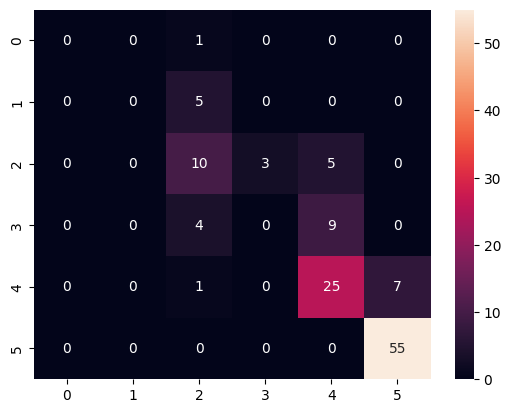

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
scs.heatmap(data=cm, annot=True)

In [15]:
from sklearn.metrics import precision_score, roc_auc_score
pc = precision_score(ytest, ypred, average="weighted")
auc = roc_auc_score(ytest, lr.predict_proba(xtest)[:,:], multi_class="ovr")
print(pc, auc)

0.6281247784473591 0.9425738260866258


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN ALGORITHM

In [16]:
df = pd.read_csv("../ml_datasets/BMI.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [17]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### Pre-processing of the data

In [18]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df['Height'] = mm.fit_transform(df[['Height']])
df['Weight'] = mm.fit_transform(df[['Weight']])

In [19]:
df.head()

,Gender,Height,Weight,Index
0,Male,0.576271,0.418182,4
1,Male,0.830508,0.336364,2
2,Female,0.762712,0.545455,4
3,Female,0.932203,0.490909,3
4,Male,0.152542,0.100000,3


### Label-encoding Gender

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [21]:
df.head()

,Gender,Height,Weight,Index
0,1,0.576271,0.418182,4
1,1,0.830508,0.336364,2
2,0,0.762712,0.545455,4
3,0,0.932203,0.490909,3
4,1,0.152542,0.100000,3


In [22]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, 0:3]
y = df['Index']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1, shuffle=True)

## Building models

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [24]:
ypred = knn.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred)
acc

0.83

In [26]:
len(xtrain)

400

## Checking for optimal k in range [1, sqrt(n)], where n = len(xtrain)

In [27]:
n = np.sqrt(len(xtrain)).astype(int)
acc_arr = []
for i in range(1,n+1):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    err = 1 - acc
    acc_arr.append(acc)

max_acc = max(acc_arr), 
max_index = acc_arr.index(max_acc) + 1
score = [1-acc_arr[x] for x in range(len(acc_arr))]

In [28]:
np.argmax(acc_arr)  # Numpy function to get the index of the highest value in the array

0

In [29]:
knn = KNeighborsClassifier(n_neighbors=max_index, p=2)
knn.fit(xtrain, ytrain)
knn.score(xtest, ytest)

0.9

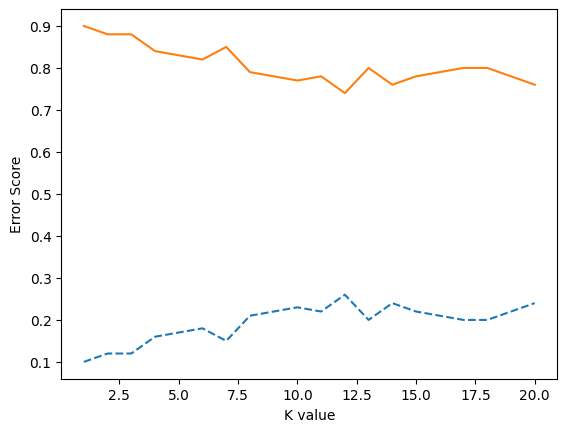

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1,21), score, linestyle="dashed", label="Error")
plt.plot(range(1,21), acc_arr, label="accuracy_score")
plt.xlabel("K value")
plt.ylabel("Error Score")
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [32]:
ypred = nb.predict(xtest)

In [34]:
from sklearn.metrics import classification_report, accuracy_score
print("accuracy_score: ", accuracy_score(ytest, ypred))

accuracy_score:  0.69


In [35]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         2
           2       0.53      0.67      0.59        15
           3       0.17      0.08      0.11        13
           4       0.58      0.68      0.62        22
           5       0.93      0.91      0.92        44

    accuracy                           0.69       100
   macro avg       0.49      0.51      0.50       100
weighted avg       0.67      0.69      0.67       100

